<a href="https://colab.research.google.com/github/GerardoMunoz/Curso_Python/blob/main/Iterative_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Tipos de soluciones

## Introducción

*Chaos: The Science of the Butterfly Effect
*https://www.youtube.com/watch?v=fDek6cYijxI

*La Ciencia del Efecto Mariposa
*https://www.youtube.com/watch?v=gIwvFMiJNVU

*El Problema de los Tres Cuerpos, una Visualización del CAOS del Cosmos
*https://youtu.be/427vNUBNguw?si=2ezZ77jrYsR1xlLc


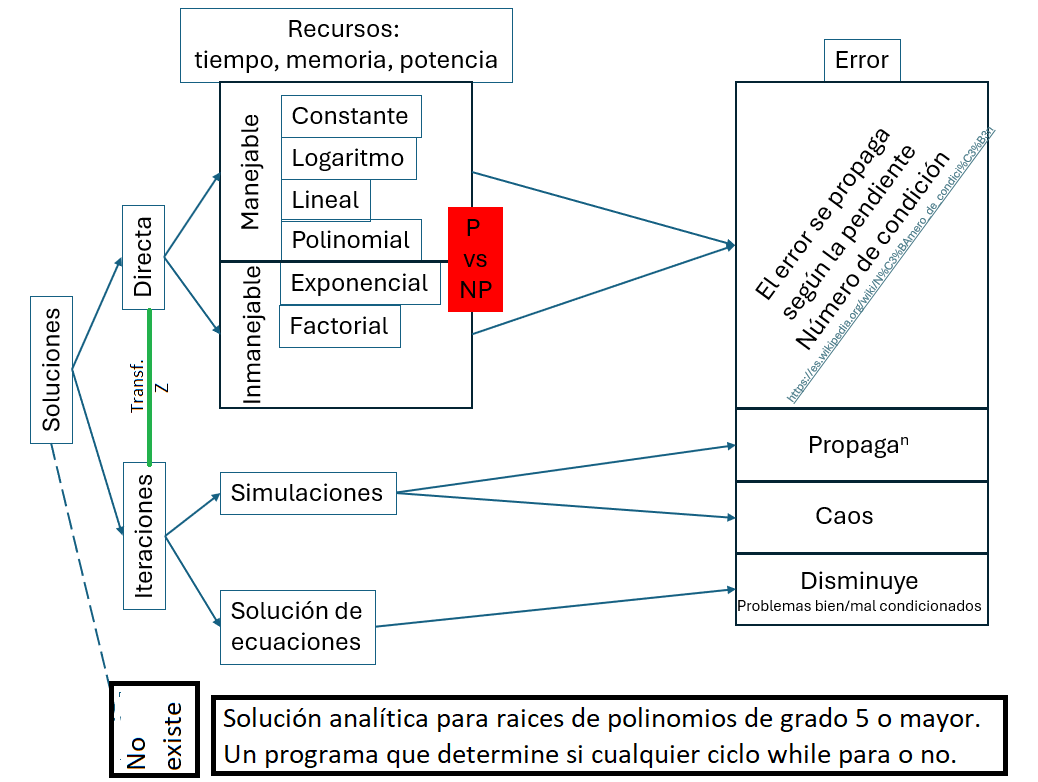

# prompt: Complexity of determinant algorithm

The complexity of the determinant algorithm depends on the method used to calculate it.

- **Cofactor expansion:** The complexity of the cofactor expansion method is O(n!), where n is the size of the matrix. This is because the method requires calculating the determinants of all n! possible submatrices of the original matrix.

- **Gaussian elimination:** The complexity of the Gaussian elimination method is O(n^3), where n is the size of the matrix. This is because the method requires performing n^3 arithmetic operations to reduce the matrix to row echelon form.

- **LU decomposition:** The complexity of the LU decomposition method is also O(n^3), but it is generally more efficient than Gaussian elimination for large matrices. This is because the LU decomposition method can be used to solve multiple systems of linear equations with the same matrix, without having to recompute the decomposition.

- **Cholesky decomposition:** The complexity of the Cholesky decomposition method is O(n^3), but it is only applicable to symmetric positive-definite matrices. This method is often used to solve linear systems of equations arising from finite element analysis and other numerical methods.

- **QR decomposition:** The complexity of the QR decomposition method is also O(n^3), but it is often used in conjunction with other methods, such as the singular value decomposition (SVD), to solve linear systems of equations and other problems in numerical linear algebra.


In [ ]:
import math
for i in range(1,20,3):
  print(i,i**3,math.factorial(i))

1 1 1
4 64 24
7 343 5040
10 1000 3628800
13 2197 6227020800
16 4096 20922789888000
19 6859 121645100408832000


In [ ]:
121645100408832000/1_000_000/60/60/24/365.25

3854.700623901437

In [ ]:
# prompt: Complejidad del algoritmo del determinante

# Cofactor expansion
def determinant_cofactor(matrix):
    n = len(matrix)
    if n == 1:
        return matrix[0][0]
    else:
        result = 0
        for i in range(n):
            submatrix = [row[:i] + row[i+1:] for row in matrix[1:]]
            result += (-1)**i * matrix[0][i] * determinant_cofactor(submatrix)
        return result

# Gaussian elimination
def determinant_gaussian(matrix):
    n = len(matrix)
    for i in range(n):
        # Find the largest element in the current column
        max_element = abs(matrix[i][i])
        max_row = i
        for j in range(i+1, n):
            if abs(matrix[j][i]) > max_element:
                max_element = abs(matrix[j][i])
                max_row = j

        # Swap the rows
        matrix[i], matrix[max_row] = matrix[max_row], matrix[i]

        # Divide the current row by the pivot element
        pivot = matrix[i][i]
        for j in range(n):
            matrix[i][j] /= pivot

        # Subtract the current row from the other rows
        for j in range(n):
            if j != i:
                factor = matrix[j][i]
                for k in range(n):
                    matrix[j][k] -= factor * matrix[i][k]

    # Calculate the determinant
    result = 1
    for i in range(n):
        result *= matrix[i][i]

    return result


## Raices de los polinómios

### Solucón de cuadrática
$x=\frac{-b ± \sqrt{b^2 - 4ac
 } }{2a}$

### Solución de cubica y de orden 4
https://mathworld.wolfram.com/CubicFormula.html

https://mathworld.wolfram.com/QuarticEquation.html

### No hay solución analítica para grado 5 y mayor

https://mathworld.wolfram.com/QuinticEquation.html

### Casos especiales con raices racionales

https://mathworld.wolfram.com/RationalZeroTheorem.html

### Métodos numériocos

https://mathworld.wolfram.com/Root-FindingAlgorithm.html

## Usando Numpy para encontrar raices de polinomios

https://interactivechaos.com/es/manual/tutorial-de-numpy/la-clase-polynomial

In [ ]:
import numpy as np

coefficients = [1, -2, 1]  # Example: x^2 - 2x + 1
roots = np.roots(coefficients)

print("Roots:", roots)

Roots: [1. 1.]


In [ ]:
import numpy as np

coefficients = [1, 1, 1]  # Example: x^2 + x + 1
roots = np.roots(coefficients)

print("Roots:", roots)

Roots: [-0.5+0.8660254j -0.5-0.8660254j]


In [ ]:
import numpy as np

coefficients = [1, 1, 1, 1, 1, 1]
roots = np.roots(coefficients)

print("Roots:", roots)
print("Num roots:", len(roots))


Roots: [ 0.5+0.8660254j  0.5-0.8660254j -1. +0.j        -0.5+0.8660254j
 -0.5-0.8660254j]
Num roots: 5


## Usando Sumpy para encontrar raices de polinomios

In [ ]:
# prompt: Con sympy solucionar una cubica

import sympy

# Define the coefficients of the cubic equation
a = sympy.Symbol("a")
b = sympy.Symbol("b")
c = sympy.Symbol("c")
d = sympy.Symbol("d")

# Construct the cubic equation
equation = a*sympy.Symbol("x")**3 + b*sympy.Symbol("x")**2 + c*sympy.Symbol("x") + d

# Solve the equation
result = sympy.solve(equation, sympy.Symbol("x"))

# Print the result
sympy.factor(result)

#pprint

⎡ ⎛                                                                           
⎢ ⎜        ⎛      ___________________________________________________         
⎢ ⎜        ⎜     ╱      2                    3        3         2  2          
⎢ ⎜ 2/3  2 ⎜    ╱  729⋅d    486⋅b⋅c⋅d   108⋅c    108⋅b ⋅d   27⋅b ⋅c     27⋅d  
⎢-⎜2   ⋅a ⋅⎜   ╱   ────── - ───────── + ────── + ──────── - ────────  + ──── -
⎢ ⎜        ⎜  ╱       2          3         3         4          4        a    
⎢ ⎝        ⎝╲╱       a          a         a         a          a              
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                                           __
⎢                                                                          ╱  
⎢                                                                         ╱   
⎢                                                                  2     ╱    
⎢                                                   